# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# defining constants and url
NUM_POINTS = 1500    
BASE_URL = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=NUM_POINTS)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=NUM_POINTS)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = BASE_URL + "&q=" + city.replace(" ", "+")

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_response = requests.get(city_url)
        city_weather = city_response.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gotse delchev
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | happy valley-goose bay
Processing Record 4 of Set 1 | west island
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | pangai
Processing Record 7 of Set 1 | kingston
Processing Record 8 of Set 1 | cill airne
Processing Record 9 of Set 1 | mili
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | hasaki
Processing Record 12 of Set 1 | port mathurin
Processing Record 13 of Set 1 | prince rupert
Processing Record 14 of Set 1 | coquimbo
Processing Record 15 of Set 1 | willemstad
Processing Record 16 of Set 1 | sidney
Processing Record 17 of Set 1 | necochea
Processing Record 18 of Set 1 | cole harbour
Processing Record 19 of Set 1 | road town
Processing Record 20 of Set 1 | buka
Processing Record 21 of Set 1 | arfoud
Processing Record 22 of Set 1 | corpus christi
Processing R

Processing Record 38 of Set 4 | tateyama
Processing Record 39 of Set 4 | mwene-ditu
Processing Record 40 of Set 4 | puerto ayora
Processing Record 41 of Set 4 | ilulissat
Processing Record 42 of Set 4 | san andres
Processing Record 43 of Set 4 | takoradi
Processing Record 44 of Set 4 | mogadishu
Processing Record 45 of Set 4 | howard springs
Processing Record 46 of Set 4 | san patricio
Processing Record 47 of Set 4 | mong cai
City not found. Skipping...
Processing Record 48 of Set 4 | island harbour
Processing Record 49 of Set 4 | ebon
Processing Record 0 of Set 5 | benghazi
Processing Record 1 of Set 5 | villa gesell
Processing Record 2 of Set 5 | tuchow
Processing Record 3 of Set 5 | plainview
Processing Record 4 of Set 5 | aioun
Processing Record 5 of Set 5 | la'ie
Processing Record 6 of Set 5 | ostersund
Processing Record 7 of Set 5 | susuman
Processing Record 8 of Set 5 | lihue
Processing Record 9 of Set 5 | saipan
Processing Record 10 of Set 5 | sydney
Processing Record 11 of Set

Processing Record 28 of Set 8 | ivanteyevka
Processing Record 29 of Set 8 | laramie
Processing Record 30 of Set 8 | antakotako
City not found. Skipping...
Processing Record 31 of Set 8 | sinabang
Processing Record 32 of Set 8 | mitsamiouli
Processing Record 33 of Set 8 | kill devil hills
Processing Record 34 of Set 8 | dauphin
Processing Record 35 of Set 8 | shahr-e babak
Processing Record 36 of Set 8 | galle
Processing Record 37 of Set 8 | kattivakkam
Processing Record 38 of Set 8 | taltal
Processing Record 39 of Set 8 | azul
Processing Record 40 of Set 8 | ahau
City not found. Skipping...
Processing Record 41 of Set 8 | hemsby
Processing Record 42 of Set 8 | banda aceh
Processing Record 43 of Set 8 | at taj
Processing Record 44 of Set 8 | ruokolahti
Processing Record 45 of Set 8 | hemmoor
Processing Record 46 of Set 8 | hovd
Processing Record 47 of Set 8 | ji'an
Processing Record 48 of Set 8 | balcarce
Processing Record 49 of Set 8 | tralee
Processing Record 0 of Set 9 | alta
Process

Processing Record 19 of Set 12 | kiunga
Processing Record 20 of Set 12 | devinuwara
City not found. Skipping...
Processing Record 21 of Set 12 | vernon
Processing Record 22 of Set 12 | magistral'nyy
Processing Record 23 of Set 12 | la sarre
Processing Record 24 of Set 12 | kabalo
Processing Record 25 of Set 12 | letlhakeng
Processing Record 26 of Set 12 | puerto francisco de orellana
Processing Record 27 of Set 12 | harstad
Processing Record 28 of Set 12 | salonta
Processing Record 29 of Set 12 | morondava
Processing Record 30 of Set 12 | port douglas
Processing Record 31 of Set 12 | yugo-kamskiy
Processing Record 32 of Set 12 | manaure
Processing Record 33 of Set 12 | fortaleza
Processing Record 34 of Set 12 | yeniseysk
Processing Record 35 of Set 12 | fallon
Processing Record 36 of Set 12 | urucuca
Processing Record 37 of Set 12 | rouissat
Processing Record 38 of Set 12 | songling
Processing Record 39 of Set 12 | riosucio
Processing Record 40 of Set 12 | kedrovyy
Processing Record 41

In [5]:
# print the keys for easy access to the data
print(city_weather)
city_weather.keys()

{'coord': {'lon': 23.1902, 'lat': 51.5377}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 59.18, 'feels_like': 58.6, 'temp_min': 59.18, 'temp_max': 59.18, 'pressure': 1014, 'humidity': 81, 'sea_level': 1014, 'grnd_level': 992}, 'visibility': 10000, 'wind': {'speed': 4.94, 'deg': 210, 'gust': 7.54}, 'clouds': {'all': 52}, 'dt': 1689920180, 'sys': {'type': 1, 'id': 1702, 'country': 'PL', 'sunrise': 1689906860, 'sunset': 1689964352}, 'timezone': 7200, 'id': 756316, 'name': 'Hola', 'cod': 200}


dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gotse delchev,41.5667,23.7333,78.73,58,0,0.54,BG,1689919890
1,papatowai,-46.5619,169.4708,43.25,67,9,17.83,NZ,1689919890
2,happy valley-goose bay,53.3168,-60.3315,57.51,82,20,4.61,CA,1689919891
3,west island,-12.1568,96.8225,80.58,69,98,18.41,CC,1689919891
4,ribeira grande,38.5167,-28.7000,68.77,94,100,4.00,PT,1689919679


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gotse delchev,41.5667,23.7333,78.73,58,0,0.54,BG,1689919890
1,papatowai,-46.5619,169.4708,43.25,67,9,17.83,NZ,1689919890
2,happy valley-goose bay,53.3168,-60.3315,57.51,82,20,4.61,CA,1689919891
3,west island,-12.1568,96.8225,80.58,69,98,18.41,CC,1689919891
4,ribeira grande,38.5167,-28.7000,68.77,94,100,4.00,PT,1689919679


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

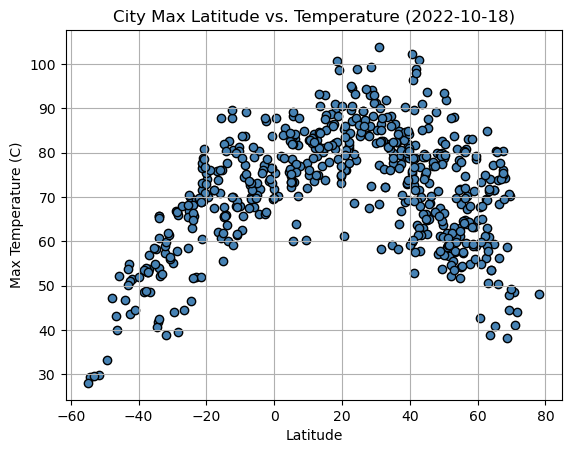

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o", edgecolors = "black", facecolors = "steelblue")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

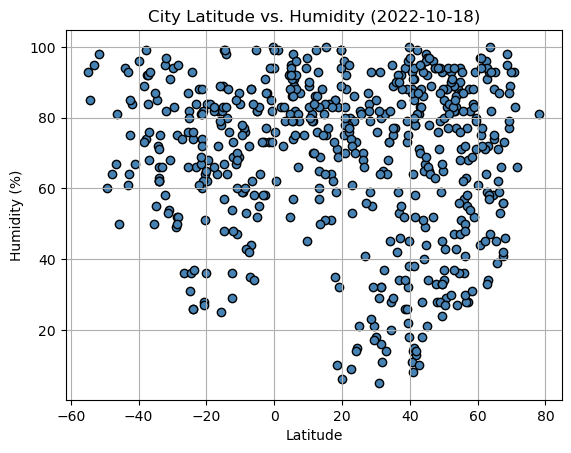

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", edgecolors = "black", facecolors = "steelblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

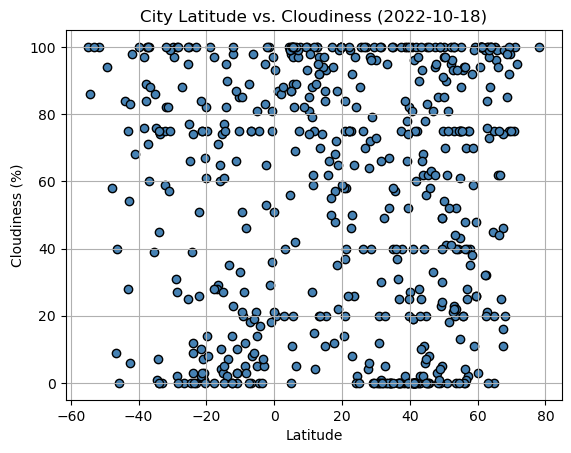

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o", edgecolors = "black", facecolors = "steelblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude Vs. Wind Speed Plot

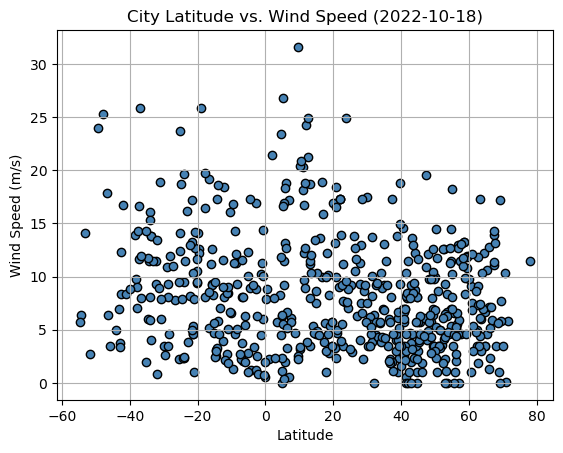

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o", edgecolors = "black", facecolors = "steelblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def linear_regression_plots(x_values, y_values, text_coordinates, x_label, y_label, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values,"r-")
    plt.annotate(line_eq, text_coordinates, fontsize=12, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    print(f"The r-value is: {rvalue**2}")

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gotse delchev,41.5667,23.7333,78.73,58,0,0.54,BG,1689919890
2,happy valley-goose bay,53.3168,-60.3315,57.51,82,20,4.61,CA,1689919891
4,ribeira grande,38.5167,-28.7000,68.77,94,100,4.00,PT,1689919679
6,kingston,17.9970,-76.7936,82.20,85,57,1.01,JM,1689919838
7,cill airne,52.0500,-9.5167,52.18,93,95,3.60,IE,1689919893


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,papatowai,-46.5619,169.4708,43.25,67,9,17.83,NZ,1689919890
3,west island,-12.1568,96.8225,80.58,69,98,18.41,CC,1689919891
5,pangai,-19.8000,-174.3500,75.63,84,75,14.14,TO,1689919640
11,port mathurin,-19.6833,63.4167,74.10,62,14,12.62,MU,1689919895
13,coquimbo,-29.9533,-71.3436,55.13,94,100,3.44,CL,1689919792


###  Temperature vs. Latitude Linear Regression Plot

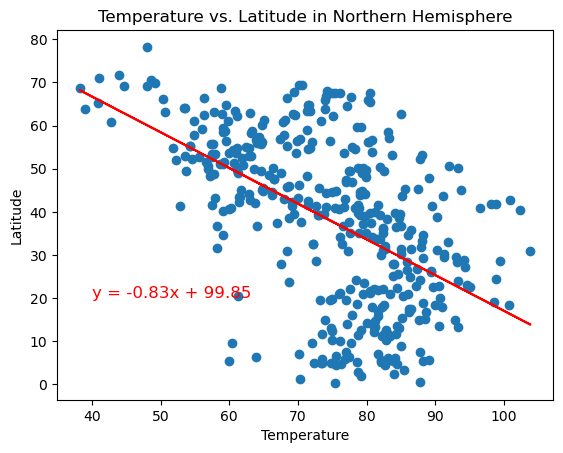

The r-value is: 0.27972074017187976


In [17]:
# Linear regression on Northern Hemisphere
linear_regression_plots(northern_hemi_df["Max Temp"], northern_hemi_df["Lat"], (40, 20),\
                        "Temperature", "Latitude", "Temperature vs. Latitude in Northern Hemisphere")

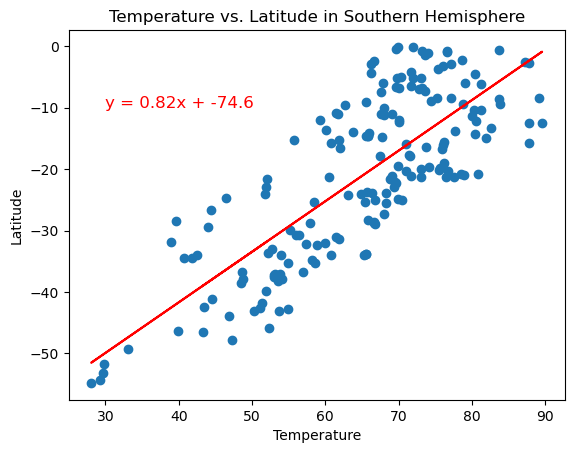

The r-value is: 0.6191482550295196


In [18]:
# Linear regression on Southern Hemisphere
linear_regression_plots(southern_hemi_df["Max Temp"], southern_hemi_df["Lat"], (30, -10), \
                        "Temperature", "Latitude", "Temperature vs. Latitude in Southern Hemisphere")

**Discussion about the linear relationship:** 

There is a negative correlation between Temperature and Latitude in Northern Hemisphere. With decreasing latitude, temperature increases.

There is a positive correlation between Temperature and Latitude in Southern Hemisphere. With increasing latitude, temperature also increases.

### Humidity vs. Latitude Linear Regression Plot

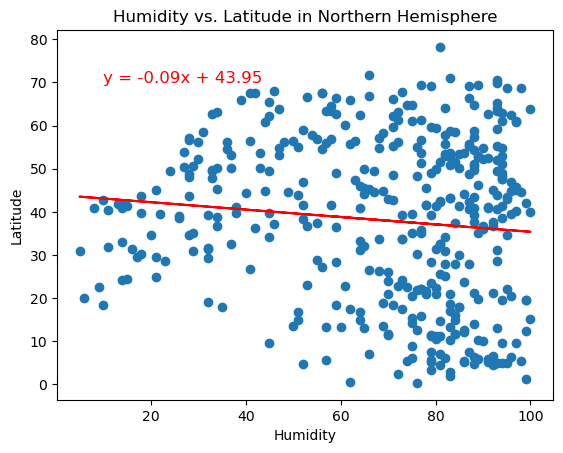

The r-value is: 0.011645070097686994


In [25]:
# Northern Hemisphere
linear_regression_plots(northern_hemi_df["Humidity"], northern_hemi_df["Lat"], (10, 70),\
                        "Humidity", "Latitude", "Humidity vs. Latitude in Northern Hemisphere")

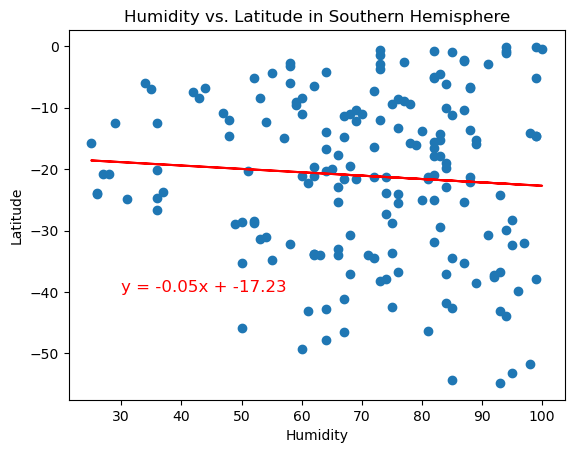

The r-value is: 0.0054582559641548406


In [26]:
# Southern Hemisphere
linear_regression_plots(southern_hemi_df["Humidity"], southern_hemi_df["Lat"], (30, -40),\
                        "Humidity", "Latitude", "Humidity vs. Latitude in Southern Hemisphere")

**Discussion about the linear relationship:** 

There is no correlation between Humidity and Latitude in both Northern and Southern hemisphere as the Pearson correlation coefficient value is close to 0.

### Cloudiness vs. Latitude Linear Regression Plot

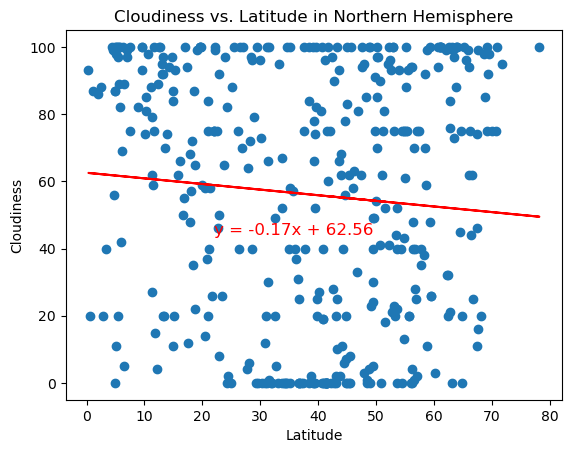

The r-value is: 0.007346331392554931


In [28]:
# Northern Hemisphere
linear_regression_plots(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], (22, 44),\
                        "Latitude", "Cloudiness", "Cloudiness vs. Latitude in Northern Hemisphere")

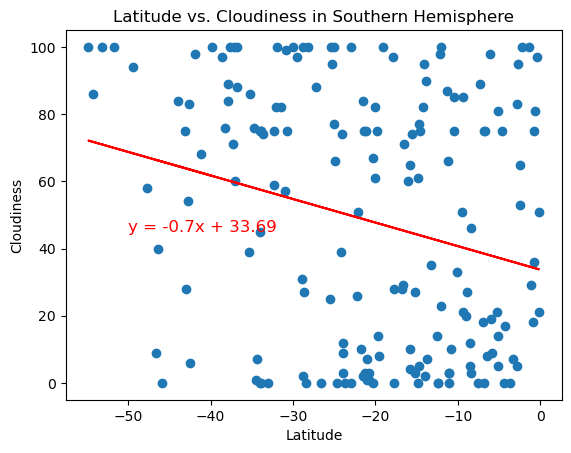

The r-value is: 0.06337671043210744


In [30]:
# Southern Hemisphere
linear_regression_plots(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], (-50, 45),\
                        "Latitude", "Cloudiness", "Latitude vs. Cloudiness in Southern Hemisphere")

**Discussion about the linear relationship:** 

There is no correlation between Cloudiness and Latitude in both Northern and Southern hemisphere as the Pearson correlation coefficient value is close to 0.

### Wind Speed vs. Latitude Linear Regression Plot

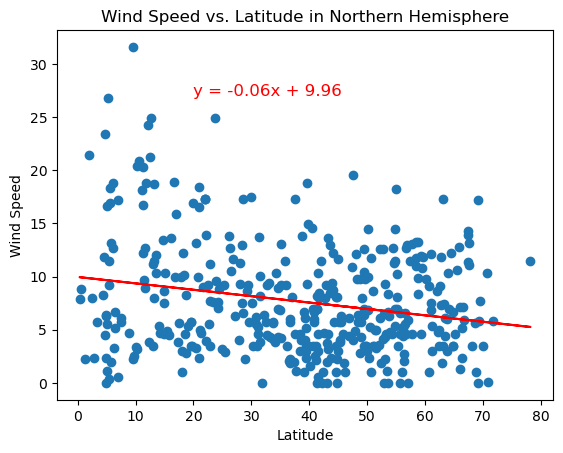

The r-value is: 0.048104829557551826


In [31]:
# Northern Hemisphere
linear_regression_plots(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], (20, 27),\
                        "Latitude", "Wind Speed", "Wind Speed vs. Latitude in Northern Hemisphere")

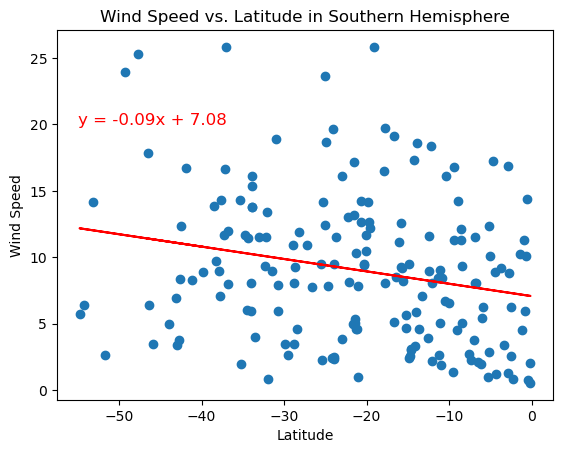

The r-value is: 0.05078762372023085


In [32]:
# Southern Hemisphere
linear_regression_plots(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], (-55, 20),\
                        "Latitude", "Wind Speed", "Wind Speed vs. Latitude in Southern Hemisphere")

**Discussion about the linear relationship:** 

There is no correlation between Wind Speed and Latitude in both Northern and Southern hemisphere as the Pearson correlation coefficient value is close to 0.